## Basic Image Enhancement Using Mathematical Operations

Image Processing techniques take advantage of mathematical operations to achieve different results. Most often we arrive at an enhanced version of the image using some basic operations. We will take a look at some of the fundamental operations often used in computer vision pipelines. In this notebook we will cover:

- Arithmetic Operations like addition, multiplication
- Thresholding & Masking
- Bitwise Operations like OR, AND, XOR

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import Image
%matplotlib inline

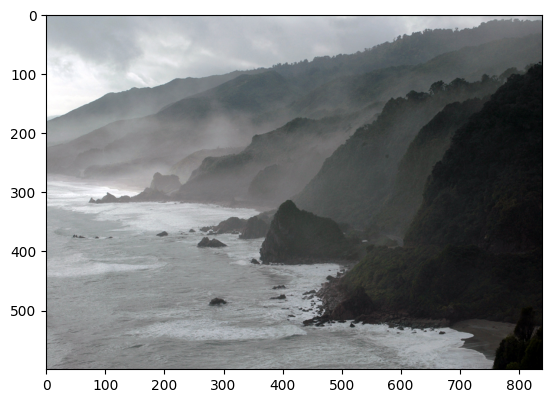

In [4]:
img_bgr = cv2.imread('New_Zealand_Coast.jpg',cv2.IMREAD_COLOR)
img_rgb = img_bgr[:,:,::-1]
plt.imshow(img_rgb)
plt.show()

## Addition or Brightness
The first operation  is simple addition of images. This results in increasing or decreasing the brightness of the image since increasing or decreasing the intensity values of each pixel by the same amount. So, this will result in a global increase/decrease in brightness.

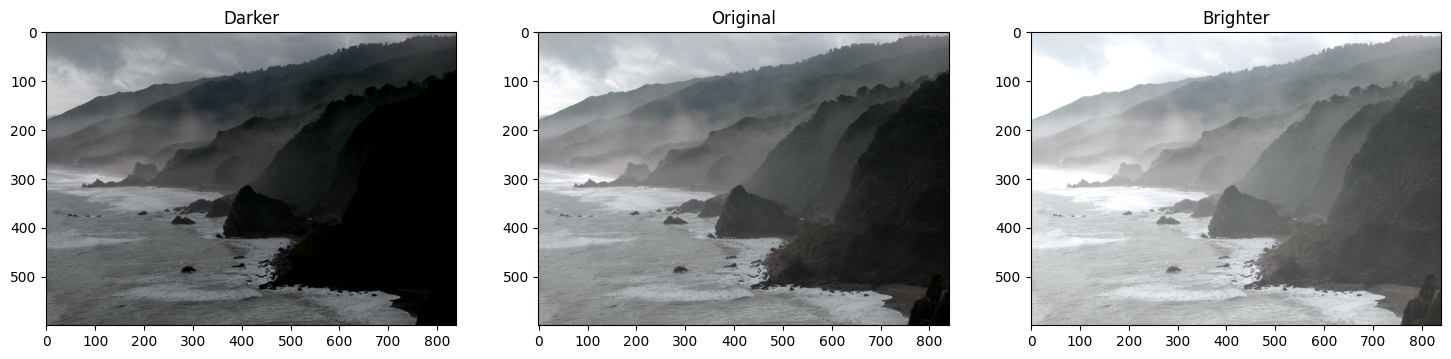

In [6]:
# Creating a bright adjustment matrix
matrix = np.ones(img_rgb.shape,dtype ="uint8") * 50 # every pixel in this matrix will have the value 50.

# Increasing the image brightness
img_rgb_brighten = cv2.add(img_rgb,matrix) # add 50 to every pixel

# Decreasing the image brightness
img_rgb_darken = cv2.subtract(img_rgb,matrix) # subtracts 50 from every pixel.

# Show the images
plt.figure(figsize=[18,7])
plt.subplot(131) ; plt.imshow(img_rgb_darken);plt.title("Darker");
plt.subplot(132) ; plt.imshow(img_rgb) ; plt.title("Original");
plt.subplot(133) ; plt.imshow(img_rgb_brighten) ; plt.title("Brighter");
plt.show()

## Multiplication or Contrast
Just like addition can result in brightness change, multiplication can be used to improve the contrast of the image.

Contrast is the difference in the intensity values of the pixels of an image. Multiplying the intensity values with a constant can make the difference larger or smaller ( if multiplying factor is < 1 ).

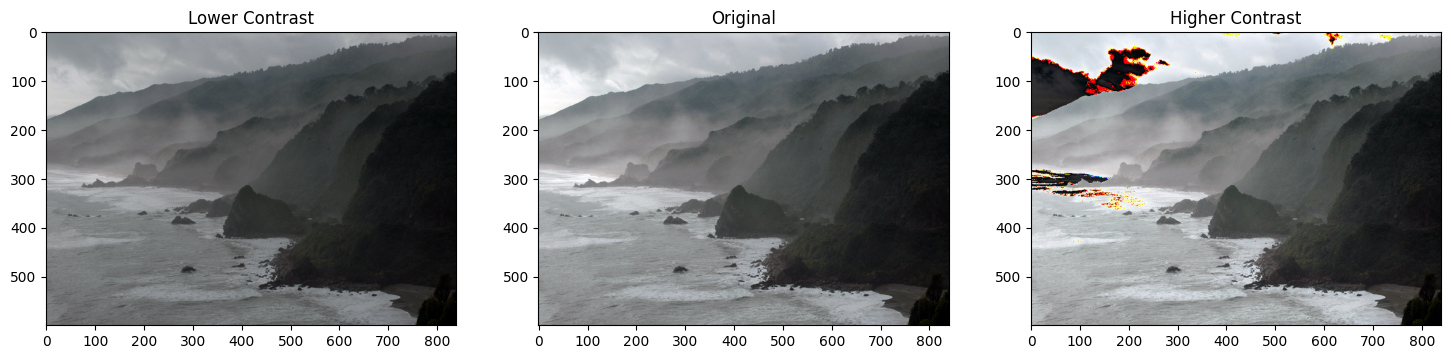

In [9]:
matrix_low_contrast = np.ones(img_rgb.shape ) * 0.8
matrix_high_contrast = np.ones(img_rgb.shape) * 1.2

img_rgb_darker = np.uint8(cv2.multiply(np.float64(img_rgb) , matrix_low_contrast))
img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img_rgb) , matrix_high_contrast))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Higher Contrast");
plt.show()

## Handling Overflow using np.clip

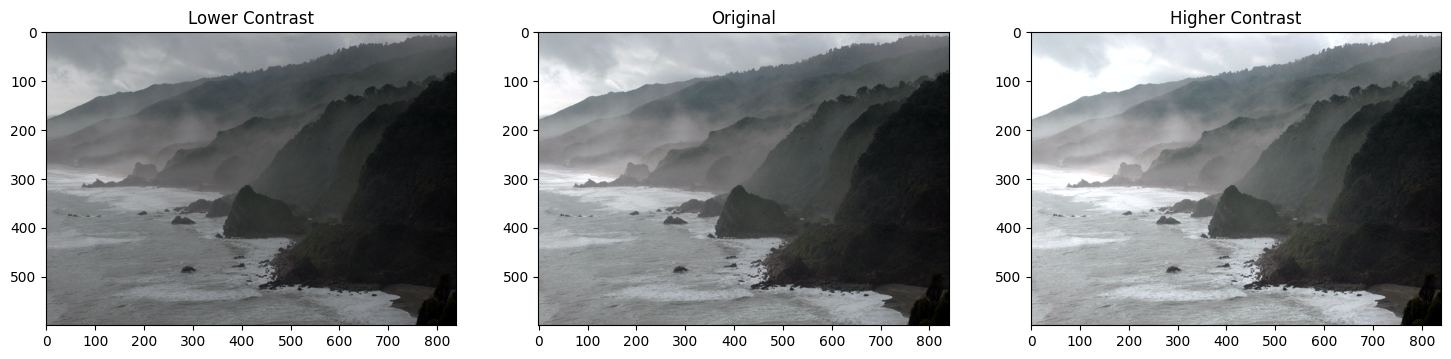

In [12]:
matrix_low_contrast = np.ones(img_rgb.shape ) * 0.8
matrix_high_contrast = np.ones(img_rgb.shape) * 1.2

img_rgb_darker = np.uint8(cv2.multiply(np.float64(img_rgb) , matrix_low_contrast))
img_rgb_brighter = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb) , matrix_high_contrast),0,255)) # Ensures pixel values stay within 0-255 (so they don’t exceed the valid range).

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Higher Contrast");
plt.show()

## Image Thresholding
Binary Images have a lot of use cases in Image Processing. One of the most common use cases is that of creating masks. Image Masks allow us to process on specific parts of an image keeping the other parts intact. Image Thresholding is used to create Binary Images from grayscale images. You can use different thresholds to create different binary images from the same original image.

### <font color="green">Function Syntax </font>

``` python
retval, dst = cv2.threshold( src, thresh, maxval, type[, dst] )
```

`dst`: The output array of the same size and type and the same number of channels as `src`.

The function has **4 required arguments**:

1. `src`: input array (multiple-channel, 8-bit or 32-bit floating point).

2. `thresh`: threshold value.

3. `maxval`: maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.

4. `type`: thresholding type (see ThresholdTypes).


### <font color="green">Function Syntax </font>

``` python
dst = cv.adaptiveThreshold( src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst] )
```

`dst`	Destination image of the same size and the same type as src.

The function has **6 required arguments**:
1. `src`:	Source 8-bit single-channel image.

2. `maxValue`:	Non-zero value assigned to the pixels for which the condition is satisfied

3. `adaptiveMethod`:	Adaptive thresholding algorithm to use, see AdaptiveThresholdTypes. The BORDER_REPLICATE | BORDER_ISOLATED is used to process boundaries.

4. `thresholdType:`	Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV, see ThresholdTypes.

5. `blockSize`:	Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.

6. `C`:	Constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or negative as well.


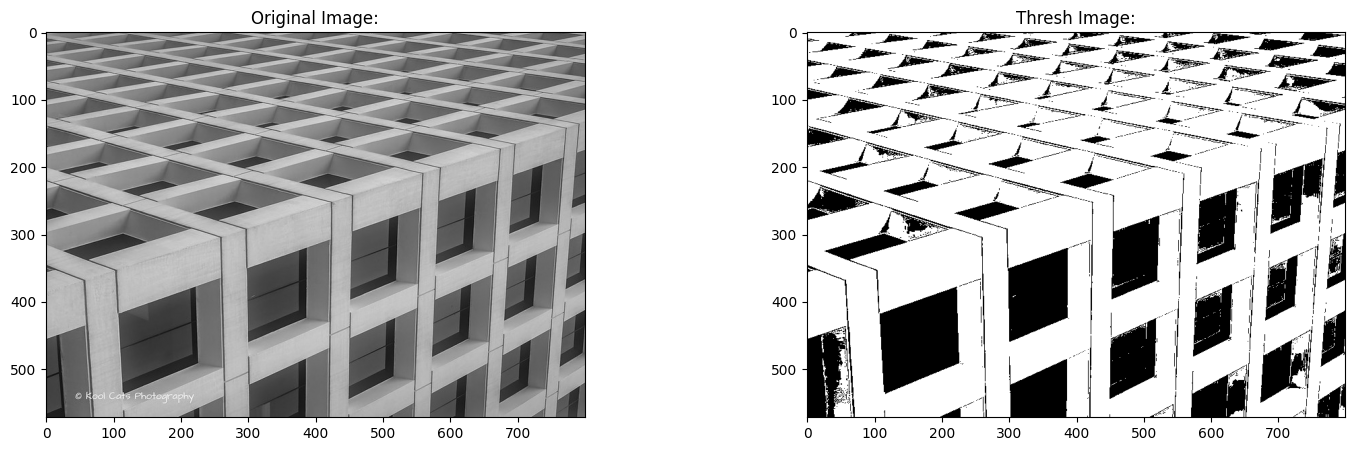

In [15]:
img_building_read = cv2.imread('building-windows.jpg',cv2.IMREAD_GRAYSCALE)
retval , img_thresh = cv2.threshold(img_building_read,100,255,cv2.THRESH_BINARY)
"""
- retval (Return Value) → The threshold value used.
- img_thresh (Thresholded Image) → The resulting binary image.

The function cv2.threshold() applies binary thresholding to img_read.
1. Threshold Value = 100
2. Maximum Value = 255
3. Threshold Type = cv2.THRESH_BINARY

- If the pixel intensity is greater than 100, it is set to 255 (white).
- If the pixel intensity is less than or equal to 100, it is set to 0 (black).
"""

plt.figure(figsize=[18,5])

plt.subplot(1,2,1) ; plt.imshow(img_building_read , cmap="gray") ; plt.title("Original Image:");
plt.subplot(1,2,2) ; plt.imshow(img_thresh , cmap="gray") ; plt.title("Thresh Image:");                                                                             
plt.show()

## Application: Sheet Music Reader
Wanted to build an application that could read (decode) sheet music. This is similar to Optical Character Recognigition (OCR) for text documents where the goal is to recognize text characters. In either application, one of the first steps in the processing pipeline is to isolate the important information in the image of a document (separating it from the background). This task can be accomplished with thresholding techniques. 

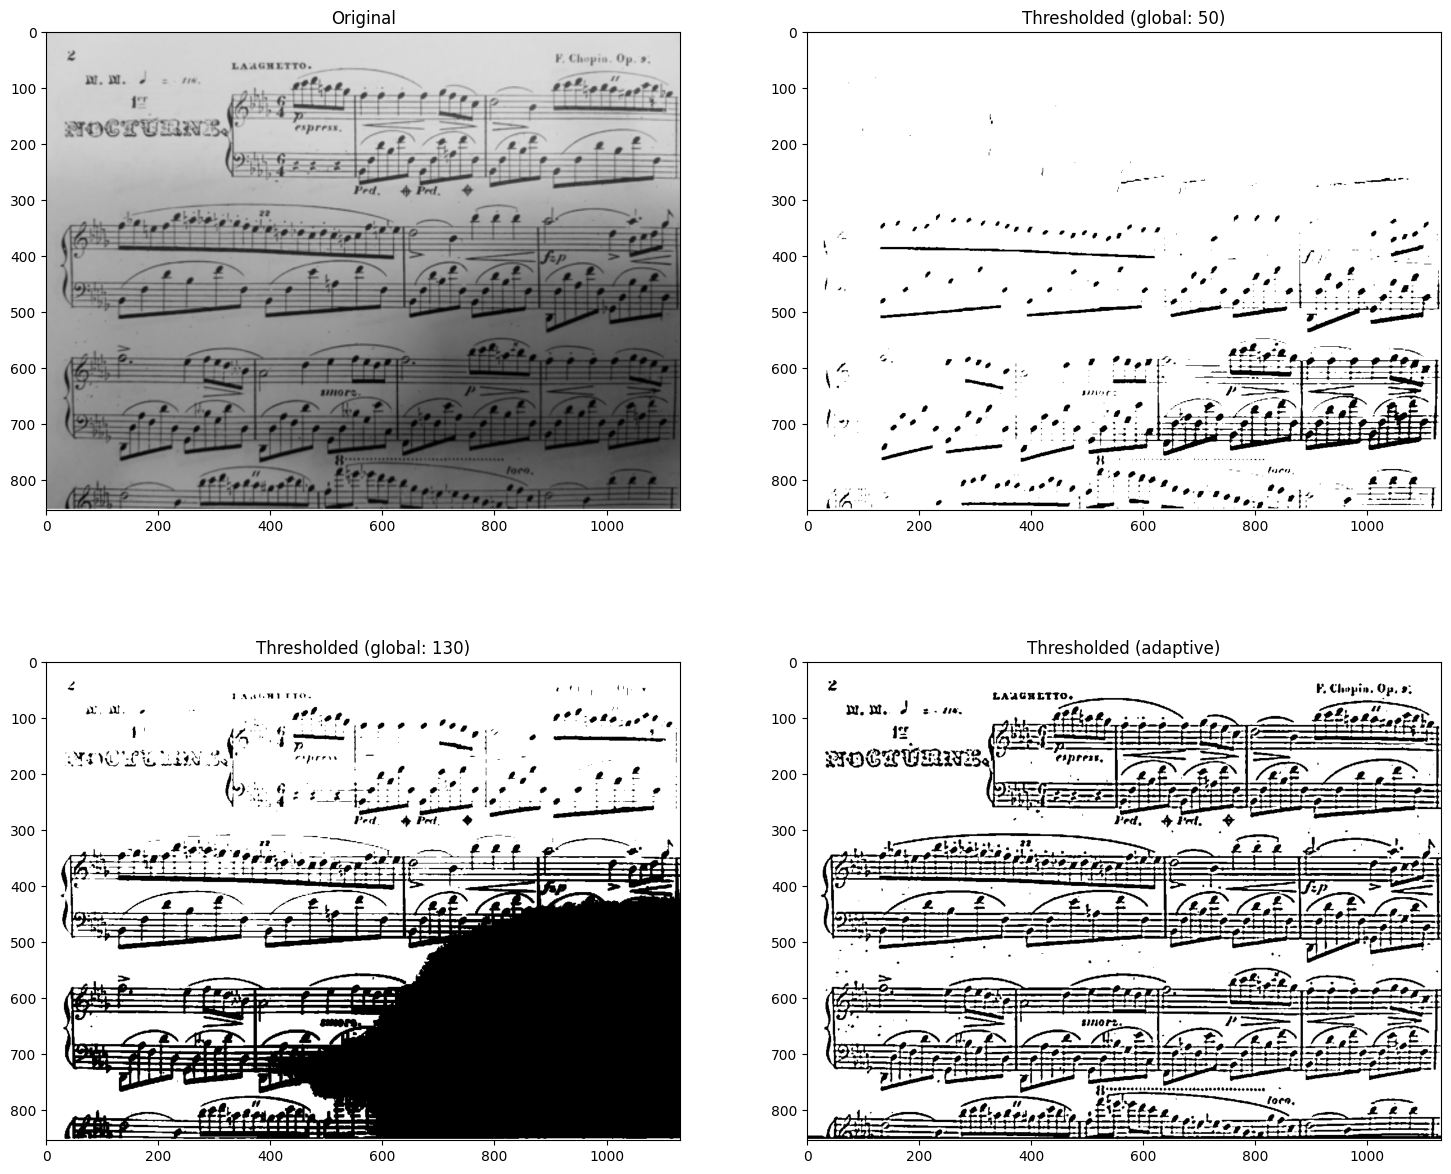

In [18]:
# Original image of the sheet 
img_original_read = cv2.imread('Piano_Sheet_Music.png',cv2.IMREAD_GRAYSCALE)

# Performing the global thresholding on the image 
retval , img_glbl_thresh_1 = cv2.threshold(img_original_read , 50 , 255 , cv2.THRESH_BINARY)
retval , img_glbl_thresh_2 = cv2.threshold(img_original_read , 120,255, cv2.THRESH_BINARY)

# Performing the adaptive thresholding 
img_thresh_adaptive = cv2.adaptiveThreshold(img_original_read,255,cv2.ADAPTIVE_THRESH_MEAN_C , cv2.THRESH_BINARY ,13,7)

"""
1. img_read → Grayscale input image.
2. 255 → Maximum pixel intensity value for white.
3. cv2.ADAPTIVE_THRESH_MEAN_C → Uses the mean of neighboring pixels as the threshold.
4. cv2.THRESH_BINARY → Converts pixels to either 0 (black) or 255 (white).
5. 11 (Block Size) → The size of the region used to calculate the local threshold.
6. 7 (C value) → A constant subtracted from the computed mean threshold to fine-tune it.
"""

plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_original_read ,        cmap="gray");  plt.title("Original");
plt.subplot(222); plt.imshow(img_glbl_thresh_1,cmap="gray");  plt.title("Thresholded (global: 50)");
plt.subplot(223); plt.imshow(img_glbl_thresh_2,cmap="gray");  plt.title("Thresholded (global: 130)");
plt.subplot(224); plt.imshow(img_thresh_adaptive,  cmap="gray");  plt.title("Thresholded (adaptive)");
plt.show()

## Bitwise Operations

### <font style="color:rgb(8,133,37)">Function Syntax</font>

Example API for `cv2.bitwise_and()`. Others include: `cv2.bitwise_or()`, `cv2.bitwise_xor()`, `cv2.bitwise_not()`

``` python
dst = cv2.bitwise_and( src1, src2[, dst[, mask]] )
```

`dst`: Output array that has the same size and type as the input arrays.

The function has **2 required arguments**:

1. `src1`:	first input array or a scalar.

2. `src2`:	second input array or a scalar.

An important optional argument is:

1. `mask`:	optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed.


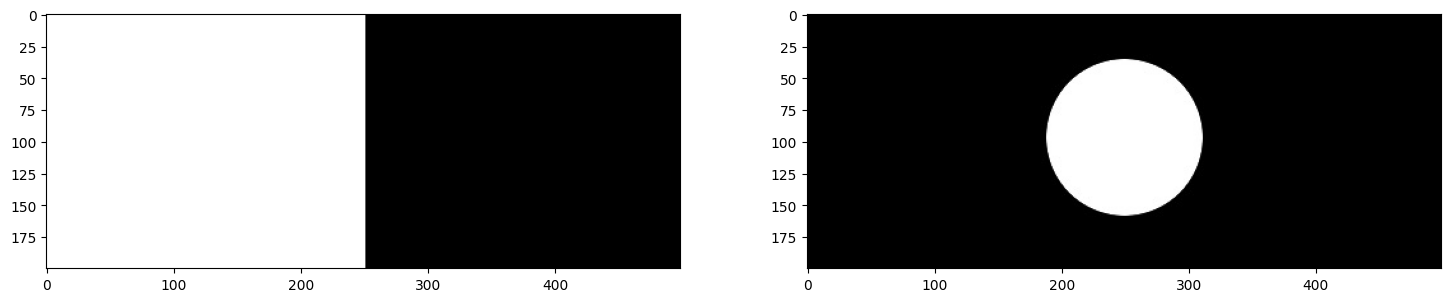

(200, 499)


In [20]:
img_rectangle = cv2.imread ('rectangle.jpg',cv2.IMREAD_GRAYSCALE)
img_circle = cv2.imread ('circle.jpg' , cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[18,5])
plt.subplot(121);plt.imshow(img_rectangle, cmap="gray")
plt.subplot(122);plt.imshow(img_circle, cmap="gray")
plt.show()
print(img_rectangle.shape)

# Bitwise AND Operator

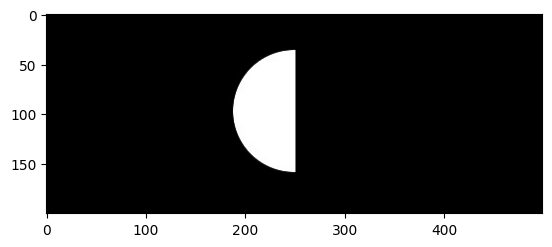

In [23]:
final_result = cv2.bitwise_and(img_rectangle,img_circle,mask=None)
plt.imshow(final_result,cmap="gray")
plt.show()

# Bitwise OR Operator

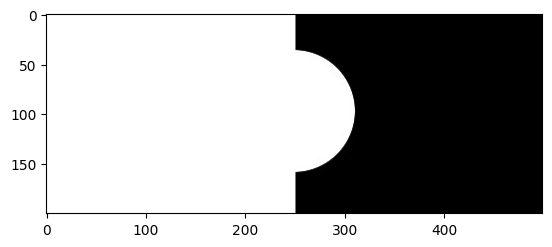

In [26]:
final_result = cv2.bitwise_or(img_rectangle,img_circle,mask=None)
plt.imshow(final_result,cmap="gray")
plt.show()

# Bitwise XOR Operator

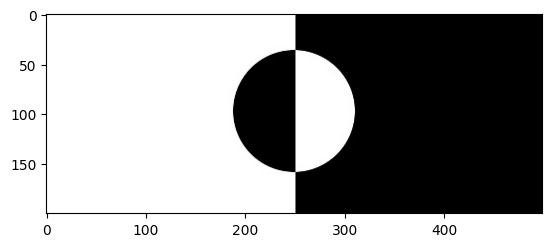

In [29]:
result = cv2.bitwise_xor(img_rectangle, img_circle, mask=None)
plt.imshow(result, cmap="gray")
plt.show()

## Application: Logo Manipulation

Fill in the white lettering of the Coca-Cola logo below with a background image.

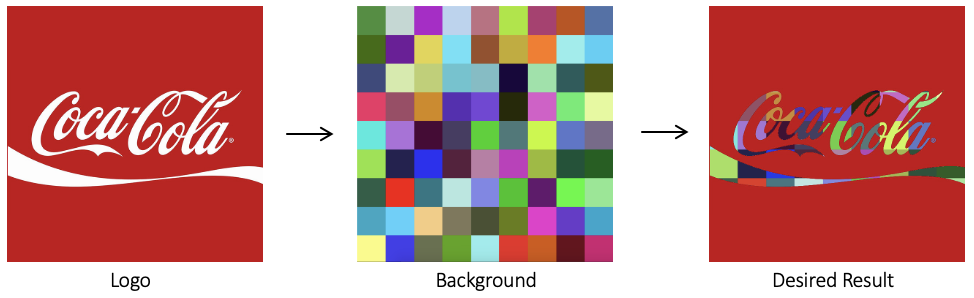

In [38]:
Image(filename='Logo_Manipulation.png')

# Read Foreground image

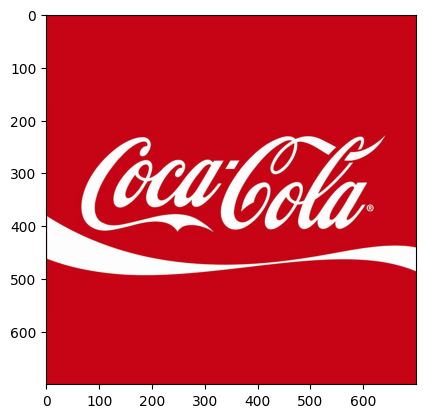

(700, 700, 3)


In [43]:
img_bgr = cv2.imread("coca-cola-logo.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()
print(img_rgb.shape)

logo_h = img_rgb.shape[0]
logo_w = img_rgb.shape[1]

# Create Mask for original Image

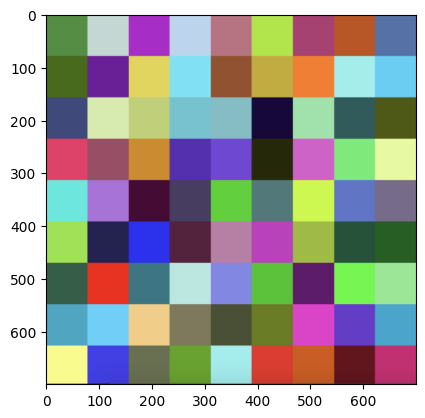

(700, 700, 3)


In [48]:
# Read in image of color cheackerboad background
img_background_bgr = cv2.imread("checkerboard_color.png")
img_background_rgb = img_background_bgr[:,:,::-1]

# Resize background image to same size as logo image
img_background_rgb = cv2.resize(img_background_rgb, (logo_w, logo_h), interpolation=cv2.INTER_AREA)

plt.imshow(img_background_rgb)
plt.show()
print(img_background_rgb.shape)

# Create Mask for the original image

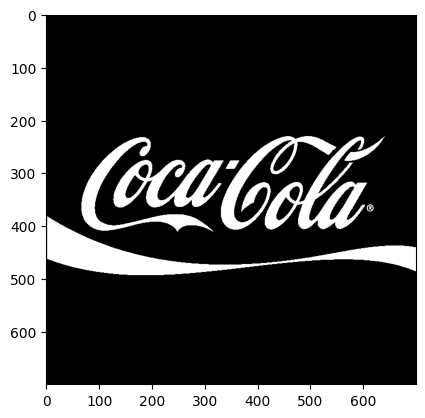

(700, 700)


In [55]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Apply global thresholding to creat a binary mask of the logo
retval, img_mask = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(img_mask, cmap="gray")
plt.show()
print(img_mask.shape)

# Invert the mask

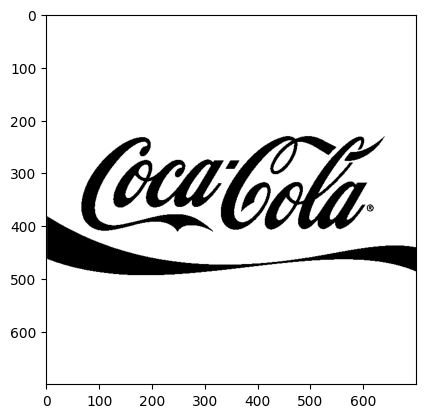

In [60]:
img_coc_invert = cv2.bitwise_not(img_mask)
plt.imshow(img_coc_invert,cmap="gray")
plt.show()

# Apply the background on the Mask

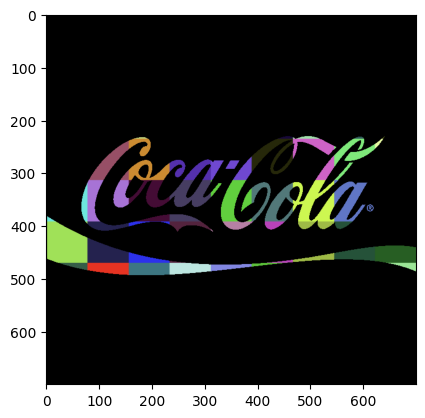

In [63]:
img_background_coc = cv2.bitwise_and(img_background_rgb,img_background_rgb ,mask = img_mask)
plt.imshow(img_background_coc)
plt.show()

# Isolate foreground from image

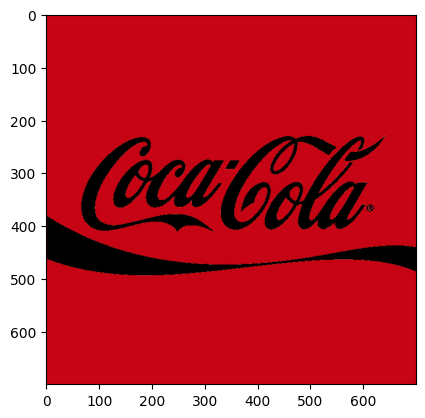

In [66]:
# Isolate foreground (red from original image) using the inverse mask
img_foreground = cv2.bitwise_and(img_rgb,img_rgb,mask = img_coc_invert)
plt.imshow(img_foreground)
plt.show()